<a href="https://colab.research.google.com/github/machave11/Bank-Marketing-Effectiveness-prediction/blob/main/Nikhil_Machave_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
bank_df = pd.read_csv('/content/drive/MyDrive/bank-full.csv', encoding = 'utf-8', delimiter=";")

In [135]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [136]:
bank_df.pdays

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [137]:
bank_df.shape

(45211, 17)

In [138]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [139]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [140]:
# Checking duplicate values
bank_df.duplicated().sum()

0

In [141]:
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In our 10 categorical columns

job and month- has 12 unique categories

education, poutcome- has 4 unique categories

marital, contact- has 3 unique categories

In [142]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [143]:
#Removing outliers from call duration
bank_df = bank_df[~((bank_df['duration']>2000) & (bank_df['y'] == 'no'))]

#Removing outliers from campaign
bank_df = bank_df[~(bank_df['campaign']>20)]

#Removing outliers from previous
bank_df = bank_df[~(bank_df['previous']>11)]

In [144]:
# lets see the categorical value and integer
catvar=bank_df.select_dtypes(include=['object']).columns
numvar=bank_df.select_dtypes(include=['int32', 'int64', 'float32','float64']).columns

In [145]:
print(catvar)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [146]:
print(numvar)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [147]:
bank_df['y'].value_counts()

no     39463
yes     5246
Name: y, dtype: int64

# Univariate analysis of categorical variable

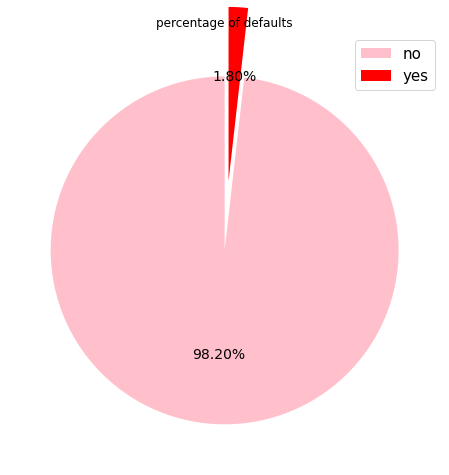

In [148]:
plt.figure(figsize=(10,8))
labels = bank_df['default'].value_counts().index.tolist()
sizes = bank_df['default'].value_counts().tolist()
explode=(0,0.4)
colors =['pink', 'red']
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('percentage of defaults')
plt.legend(labels, loc=1, prop = {'size': 15})

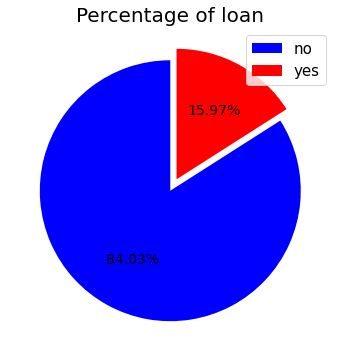

In [149]:
plt.figure(figsize=(7,6))
labels = bank_df['loan'].value_counts().index.tolist()
sizes = bank_df['loan'].value_counts().tolist()
explode = (0, 0.1)
colors = ['blue','red']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of loan', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})


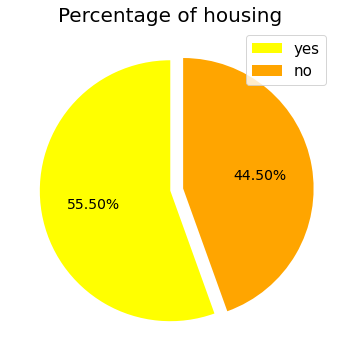

In [150]:
plt.figure(figsize=(7,6))
labels = bank_df['housing'].value_counts().index.tolist()
sizes = bank_df['housing'].value_counts().tolist()
explode = (0, 0.1)
colors = ['yellow','orange']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of housing', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})

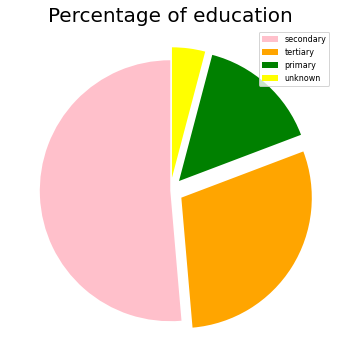

In [151]:
plt.figure(figsize=(10,6))
labels = bank_df['education'].value_counts().index.tolist()
sizes = bank_df['education'].value_counts().tolist()
explode = (0, 0.1,0.1,0.1)
colors = ['pink','orange','green','yellow']
plt.pie(sizes, explode=explode, colors=colors, startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of education', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 8})

In [152]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

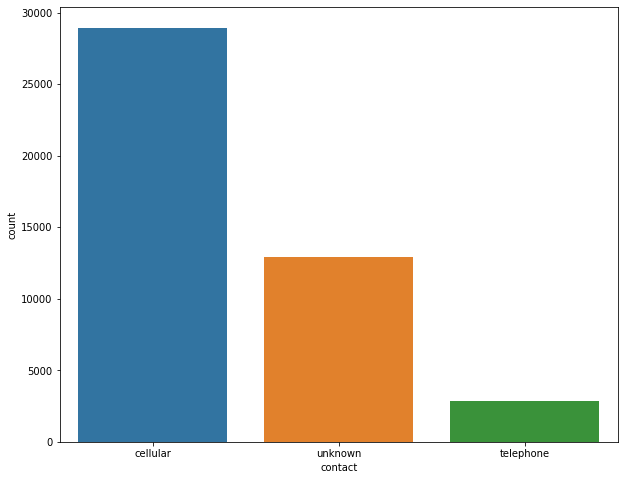

In [153]:
plt.figure(figsize=(10,8))
sns.countplot(x='contact', data=bank_df, order=bank_df['contact'].value_counts().index)
plt.show()

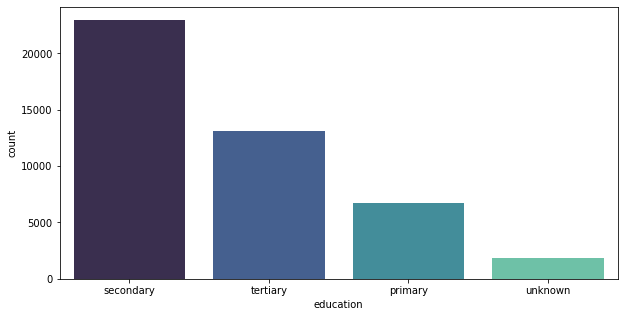

In [154]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'education',
              data = bank_df,
              order = bank_df['education'].value_counts().index,palette="mako")
plt.show()

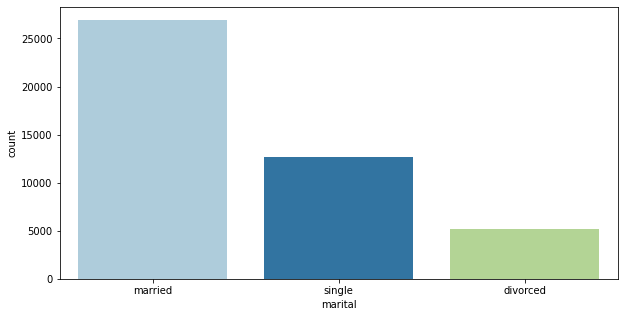

In [155]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital',
              data = bank_df,
              order = bank_df['marital'].value_counts().index,palette="Paired")
plt.show()

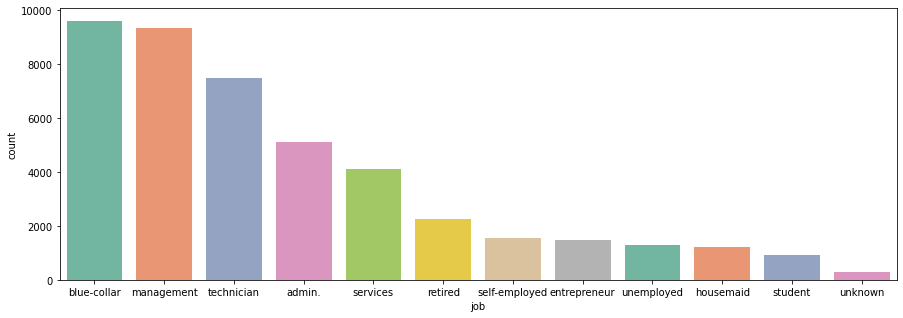

In [156]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'job',
              data = bank_df,
              order = bank_df['job'].value_counts().index,palette="Set2")
plt.show()

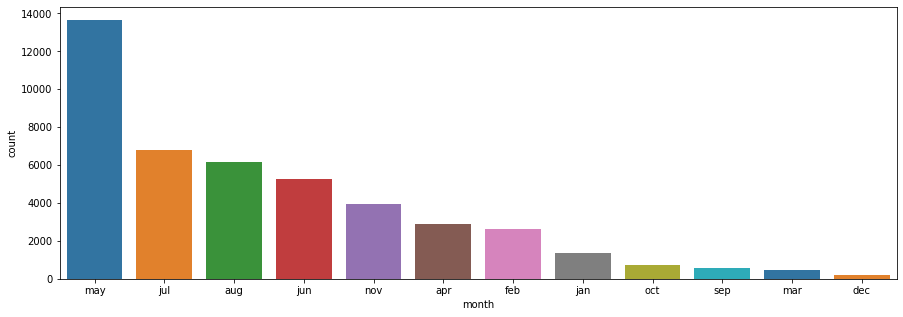

In [157]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'month',
              data = bank_df,
              order = bank_df['month'].value_counts().index,palette="tab10")
plt.show()

# Univarient Analysis on numerical data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


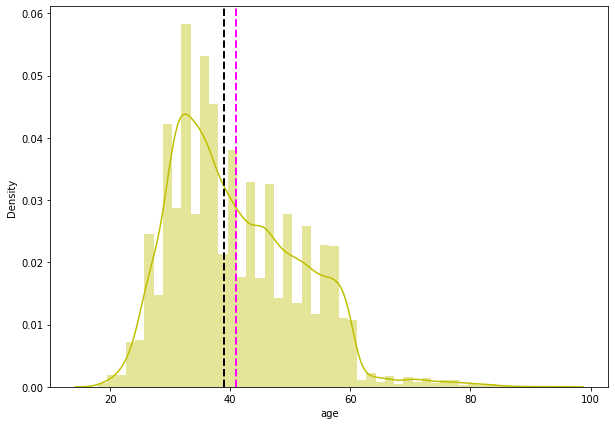

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


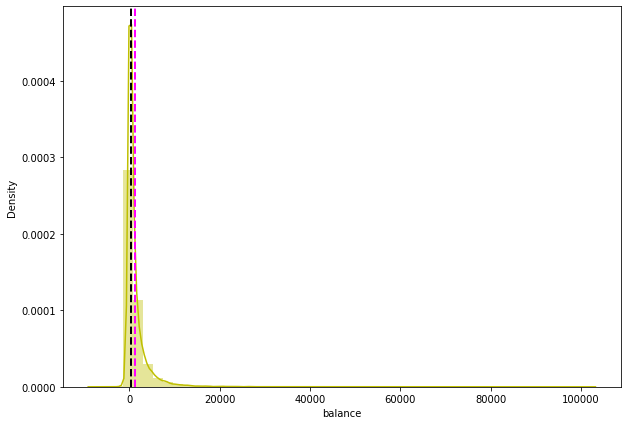

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


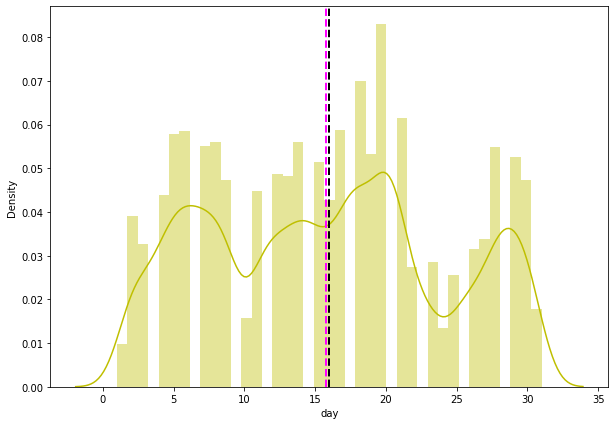

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


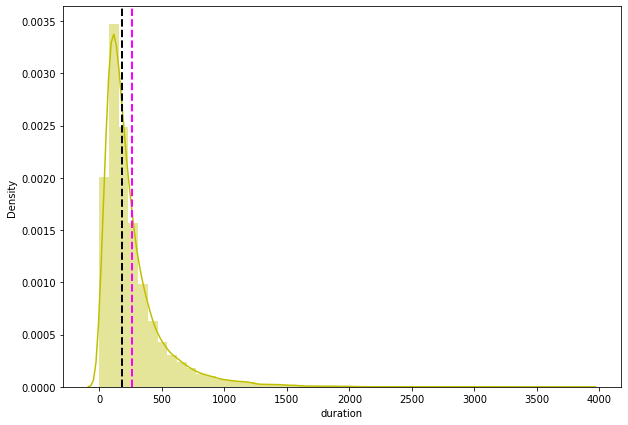

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


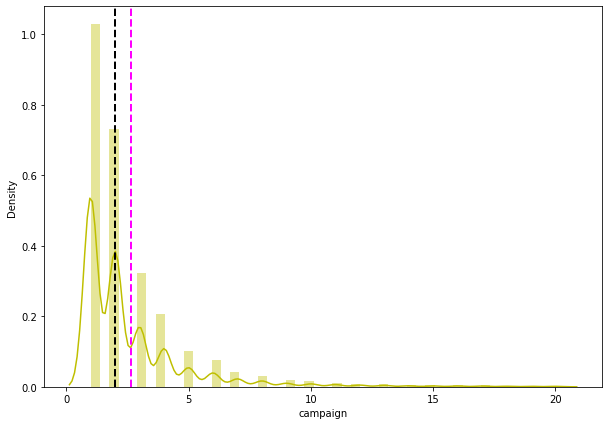

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


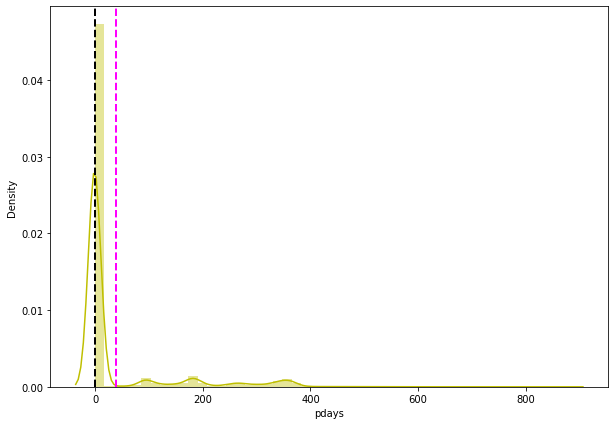

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


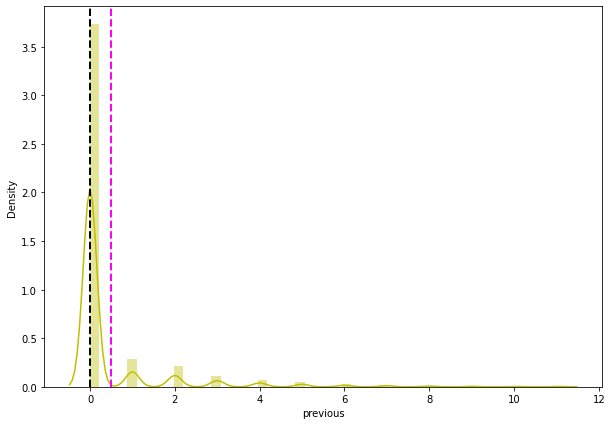

In [158]:
def distplot(col):

  plt.figure(figsize=(10,7))
  plt.xlabel(col)
  ax=sns.distplot(bank_df[col],hist=True,color='y')
  ax.axvline(bank_df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(bank_df[col].median(),color='black',linestyle='dashed',linewidth=2)
  plt.show()

for col in numvar:
    distplot(col)

# Bivarient Analysis

In [159]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

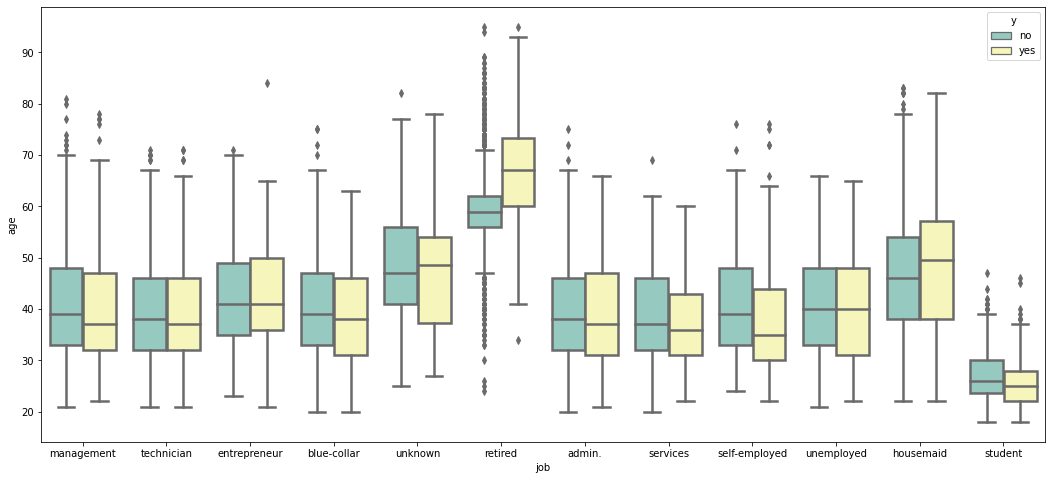

In [160]:
plt.figure(figsize=(18,8))
sns.boxplot(x="job", y="age", hue="y",
                 data=bank_df, palette="Set3",linewidth=2.5)

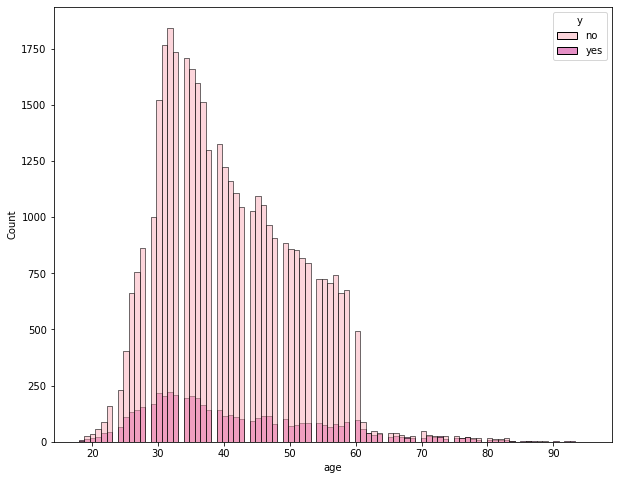

In [161]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x="age",hue="y",palette='RdPu')

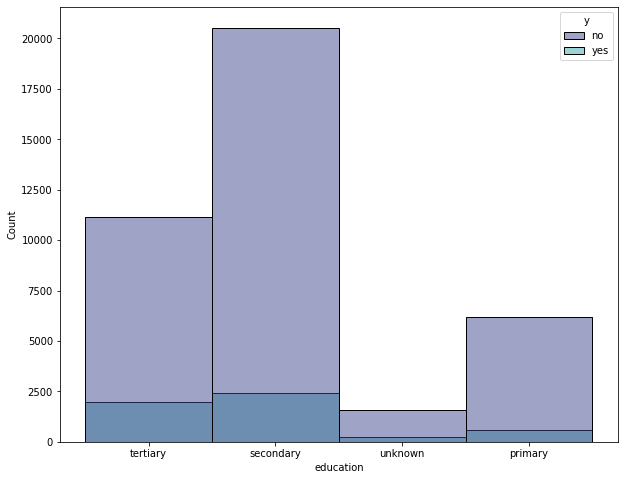

In [162]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x='education',hue="y",palette= 'mako')

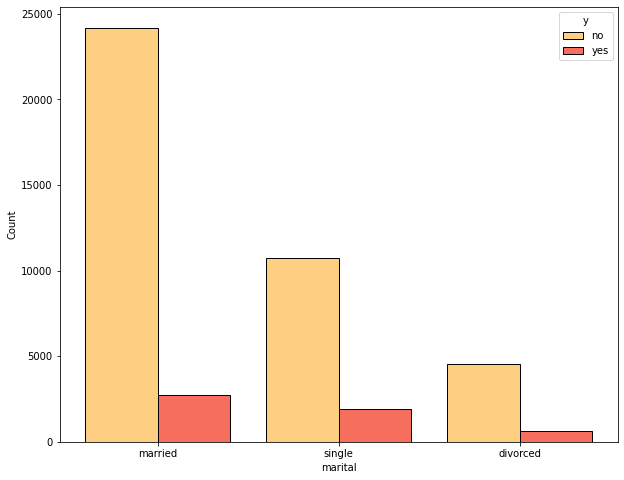

In [163]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x="marital", hue="y", multiple="dodge", shrink=.8,palette='YlOrRd')

In [201]:
numerical = ['age',	'balance',	'duration','campaign',	'pdays',	'previous']
categorical = ['job', 'education','default','housing',	'loan',		'month',	'poutcome']

#Total numbers of plots = 5x9 = 45

In [203]:
def convert_age(age):
  if age < 25 :
     return 'struggling'
  elif age < 48 :
     return 'stable'
  elif age < 57 :
     return 'about to retire'
  elif age < 72:
     return 'old age'
  else: 
     return 'counting a last breathe'

In [204]:
bank_df["age_cat"]=bank_df["age"].apply(lambda age : convert_age(age))

In [205]:
bank_df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,age_cat
0,58,management,3,0,2143,1,0,5,5,261,1,-1,0,0,old age
1,44,technician,2,0,29,1,0,5,5,151,1,-1,0,0,stable
2,33,entrepreneur,2,0,2,1,1,5,5,76,1,-1,0,0,stable
3,47,blue-collar,0,0,1506,1,0,5,5,92,1,-1,0,0,stable
4,33,unknown,0,0,1,0,0,5,5,198,1,-1,0,0,stable


In [206]:
bank_df['default']=bank_df['default'].apply(lambda x : 1 if x=='yes' else 0)
bank_df['housing']=bank_df['housing'].apply(lambda x : 1 if x=='yes' else 0)
bank_df['loan']=bank_df['loan'].apply(lambda x : 1 if x=='yes' else 0)
bank_df['y']=bank_df['y'].apply(lambda x : 1 if x=='yes' else 0)

In [207]:
#encoding the month column
month_dict={'jan': 1,'feb':2 ,'mar': 3,'apr':4,
            'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [208]:
bank_df['month']=bank_df['month'].map(month_dict)

In [171]:
bank_df["education"]=bank_df["education"].apply(lambda education : encode(education))

In [172]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,old age
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,stable
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,stable
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,stable
4,33,unknown,single,0,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,stable


In [173]:
#lebel enncoding for jobs
def cluster_job(job):
    cat_1=['blue-collar','management','technician','admin.','services']
    cat_2=['retired']
    cat_3=['self-employed','entrepreneur']
    cat_4=['unemployed','housemaid','student','unknown']

    if job in cat_1 :
       return 'cat1'
    if job in cat_2 :
       return 'cat2'
    if job in cat_3 :
       return 'cat3'
    if job in cat_4 :
       return 'cat4'
    return job

In [174]:
bank_df['new_jobs']=bank_df['job'].apply(cluster_job)

In [175]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat,new_jobs
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,old age,cat1
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,stable,cat1
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,stable,cat3
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,stable,cat1
4,33,unknown,single,0,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,stable,cat4
5,35,management,married,3,0,231,1,0,unknown,5,5,139,1,-1,0,unknown,0,stable,cat1
6,28,management,single,3,0,447,1,1,unknown,5,5,217,1,-1,0,unknown,0,stable,cat1
7,42,entrepreneur,divorced,3,1,2,1,0,unknown,5,5,380,1,-1,0,unknown,0,stable,cat3
8,58,retired,married,1,0,121,1,0,unknown,5,5,50,1,-1,0,unknown,0,old age,cat2
9,43,technician,single,2,0,593,1,0,unknown,5,5,55,1,-1,0,unknown,0,stable,cat1


In [176]:
bank_df.contact.replace({})

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 44709, dtype: object

# one hot encoder

In [177]:
# Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
marital = pd.get_dummies(bank_df['marital'])
contact = pd.get_dummies(bank_df['contact'], prefix='contact')
poutcome = pd.get_dummies(bank_df['poutcome'], prefix = 'poutcome')
age_cat = pd.get_dummies(bank_df['age_cat'])
new_jobs = pd.get_dummies(bank_df['new_jobs'])

In [178]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_cat', 'new_jobs'],
      dtype='object')

In [179]:
bank_df.drop(['marital','contact','poutcome','age_cat','new_jobs'],axis=1,inplace=True)

In [180]:
bank_df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [181]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [182]:
calc_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['y',]]])

,variables,VIF
0,age,8.780842
1,education,6.225557
2,default,1.028856
3,balance,1.240582
4,housing,2.112174
5,loan,1.205785
6,day,4.487725
7,month,7.165803
8,duration,2.006299
9,campaign,2.187319


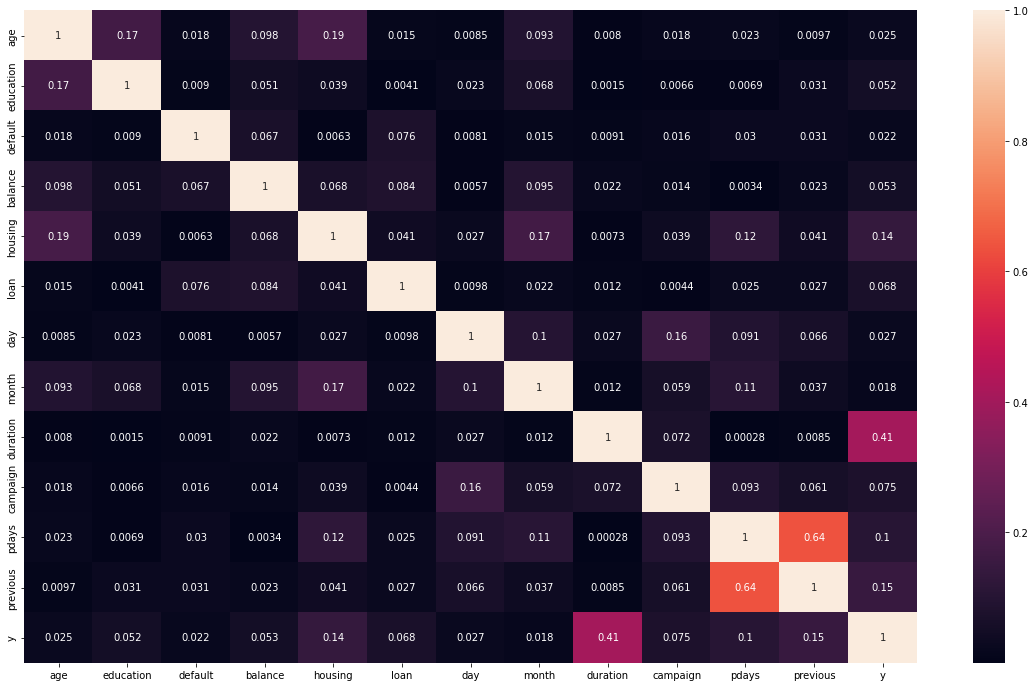

In [185]:
# Plotting correlation matrix
plt.subplots(figsize=(20,12))
sns.heatmap(bank_df.corr().abs(), annot=True)